In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

## Data Exploration


In [2]:
df = pd.read_csv('liar_dataset/train.tsv', sep='\t', header=None)

In [3]:
df.shape

(10240, 14)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


## **Extracting the training data** 



### Independent of scenario.

In [5]:
dftest = pd.read_csv('liar_dataset/test.tsv', sep='\t', header=None)

In [6]:
y_train = df[1]
y_train.unique()

y_test = dftest[1]
y_test.unique()

array(['true', 'false', 'half-true', 'pants-fire', 'barely-true',
       'mostly-true'], dtype=object)

In [7]:
X_train = df[2]
X_test = dftest[2]

### Train and test for Scenario1 (true x all)

In [8]:
y_train_s1 = y_train.copy()
y_train_s1[y_train != "true"] = "false"  #every label that is not true will become false

y_test_s1 = y_test.copy()
y_test_s1[y_test != "true"] = "false"  #every label that is not true will become false
print(y_test_s1.shape)

(1267,)


### Train and test for Scenario 2 (true + mostly true + half true) x all)

In [9]:
y_train_s2 = y_train.copy()
y_train_s2[y_train == "mostly-true"] = "true"  
y_train_s2[y_train == "half-true"] = "true" 

y_test_s2 = y_test.copy()
y_test_s2[y_test == "mostly-true"] = "true"
y_test_s2[y_test == "half-true"] = "true"

# label all those that are left with "false"
y_train_s2[y_train_s2 != 'true'] = 'false'
y_test_s2[y_test_s2 != 'true'] = 'false'

## TODO Building Vectorizer Classifiers/Features 

In [10]:
# tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [11]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_vectorizer.get_feature_names()[:10]
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [12]:
hash_vectorizer = HashingVectorizer(stop_words='english')
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

## Evaluation - SVM

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Scenario1

In [14]:
clf = svm.SVC()

accuracy:   0.836
Confusion matrix, without normalization


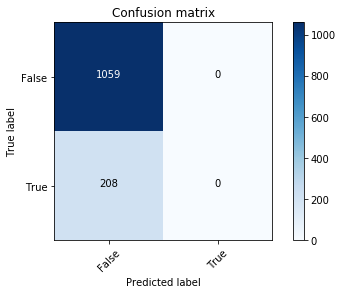

In [15]:
clf.fit(hash_train, y_train_s1)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test_s1, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test_s1, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['False', 'True'])


### Scenario2

In [16]:
clf = svm.SVC()

accuracy:   0.564
Confusion matrix, without normalization


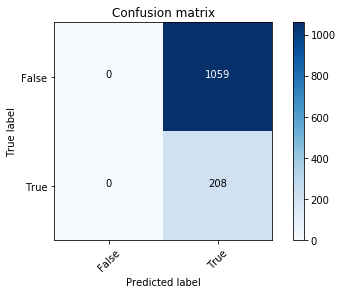

In [17]:
clf.fit(hash_train, y_train_s2)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test_s2, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test_s1, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['False', 'True'])

As SVMs are not performing well, another try:

## RandomForest

### Scenario1

In [18]:
rfclf = RandomForestClassifier()

accuracy:   0.832
Confusion matrix, without normalization


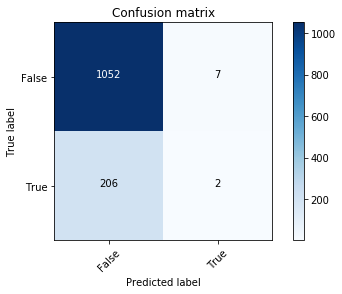

In [19]:
rfclf.fit(hash_train, y_train_s1)
pred = rfclf.predict(hash_test)
score = metrics.accuracy_score(y_test_s1, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test_s1, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['False', 'True'])

## Scenario2

accuracy:   0.582
Confusion matrix, without normalization


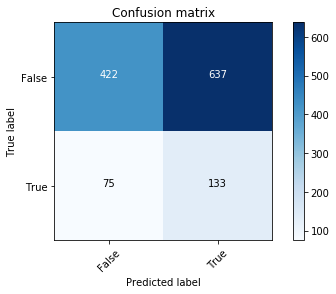

In [20]:
rfclf = RandomForestClassifier()
rfclf.fit(hash_train, y_train_s2)
pred = rfclf.predict(hash_test)
score = metrics.accuracy_score(y_test_s2, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test_s1, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['False', 'True'])